<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from  tensorflow.keras.datasets import fashion_mnist

In [22]:
#
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()
train_data[0].shape

(28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



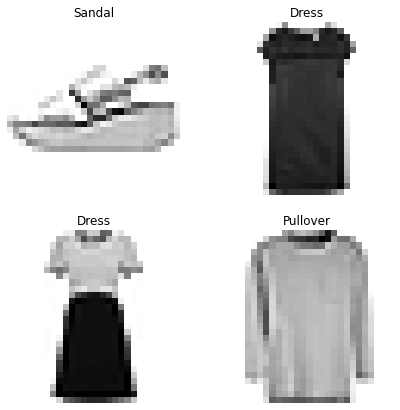

In [4]:
import random 
plt.figure(figsize=(7,7 ))
for i in range (4):
    ax=plt.subplot(2,2,i+1)
    number=random.choice(range(len(train_data)))
    plt.imshow(train_data[number],cmap=plt.cm.binary)
    plt.title(class_names[train_labels[number]])
    plt.axis(False)

In [6]:
#checking out input and output shape
train_data.shape,train_labels[0].shape# we have 10 output shape because we have 10 classes

((60000, 28, 28), ())

In [19]:
#creating model

tf.random.set_seed(42)
model1=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),# we have to define out input shape 
tf.keras.layers.Dense(4,activation="relu"),    
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax")
])
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
# if our labels are one-hot encoded we need use CategoricalCrossentropy() ,and if  our labels are int encoded we need use SpareCategoricalCrossentropy()
history1=model1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy:

In [20]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
#lets normalize our data 
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [47]:
#train our data with normalized data
tf.random.set_seed(42)
model2=tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(4,activation="relu"),
tf.keras.layers.Dense(10,activation="softmax"),
])
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history2=model2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [50]:
model2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658251643180847, 0.8014000058174133]